In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [2]:
# Load the dataset
file_path = '/content/kc_house_data.csv'  # Update with your file path
house_data = pd.read_csv(file_path)

# Display basic info and check the first few rows
print(house_data.info())
house_data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
# Drop irrelevant columns
house_data = house_data.drop(columns=['id', 'date'])  # 'id' and 'date' are unlikely to influence house prices

# Check for missing values
print("Missing values in each column:\n", house_data.isnull().sum())

# Define the feature matrix (X) and target variable (y)
X = house_data.drop(columns=['price'])  # Features
y = house_data['price']                # Target

# Check correlation to identify highly correlated features (optional)
correlation = house_data.corr()
correlation['price'].sort_values(ascending=False)


Missing values in each column:
 price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


,price
price,1.000000
sqft_living,0.702035
grade,0.667434
sqft_above,0.605567
sqft_living15,0.585379
bathrooms,0.525138
view,0.397293
sqft_basement,0.323816
bedrooms,0.308350
lat,0.307003


In [4]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the train and test sets
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (17290, 18)
Testing set shape: (4323, 18)


In [5]:
# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Display model coefficients
print("Model coefficients:", model.coef_)
print("Model intercept:", model.intercept_)


Model coefficients: [-3.43354187e+04  4.45645289e+04  1.09015817e+02  8.88473539e-02
  7.00312952e+03  5.62413070e+05  5.36411070e+04  2.45267101e+04
  9.45678917e+04  7.00227409e+01  3.89930758e+01 -2.68076890e+03
  2.04156328e+01 -5.52253038e+02  5.95968122e+05 -1.94585724e+05
  2.12143306e+01 -3.25831873e-01]
Model intercept: 6643873.527888229


In [6]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R² Score:", r2)


Mean Squared Error (MSE): 45173046132.7897
Mean Absolute Error (MAE): 127493.34208656367
R² Score: 0.7011904448878442


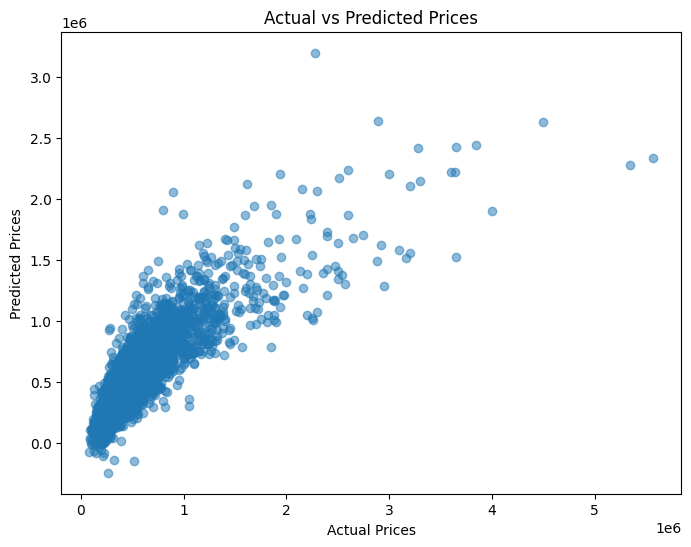

In [7]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs predicted prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()


In [8]:
def predict_price(model, feature_values):
    """
    Predict the price of a house given its feature values.

    Parameters:
    - model: Trained Linear Regression model.
    - feature_values: Dictionary of feature names and their corresponding values.

    Returns:
    - Predicted house price.
    """
    # Convert the dictionary of feature values into a DataFrame
    input_data = pd.DataFrame([feature_values])

    # Predict the price using the trained model
    predicted_price = model.predict(input_data)[0]

    return predicted_price

# Example usage:
# Feature values for a hypothetical house
example_features = {
    'bedrooms': 3,
    'bathrooms': 2,
    'sqft_living': 2000,
    'sqft_lot': 5000,
    'floors': 1,
    'waterfront': 0,
    'view': 0,
    'condition': 3,
    'grade': 7,
    'sqft_above': 2000,
    'sqft_basement': 0,
    'yr_built': 1990,
    'yr_renovated': 0,
    'zipcode': 98178,
    'lat': 47.5112,
    'long': -122.257,
    'sqft_living15': 1500,
    'sqft_lot15': 4000
}

# Predict price
predicted_price = predict_price(model, example_features)
print("Predicted Price for the given house:", predicted_price)


Predicted Price for the given house: 312393.039794635
